# Regression

# Intro

Regression is a fundamental supervised machine learning technique, used to map input features into continuous output values.

In this project, we'll be using various types of regression to predict housing prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from itertools import combinations_with_replacement


In [2]:
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 

This dataset contains the housing prices for houses in Sindian Dist., New Taipei City, and Taiwan, along with 6 features that we can use to predict these prices.

First, let's plot each feature against the true housing prices.

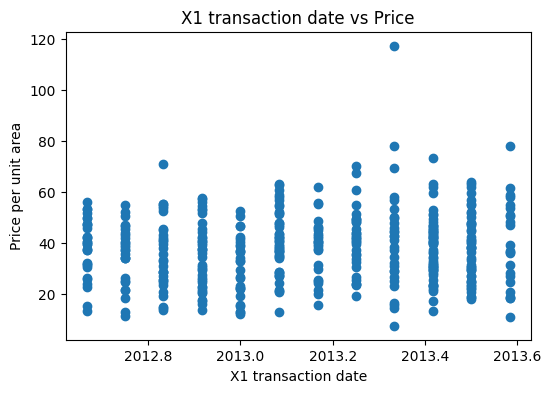

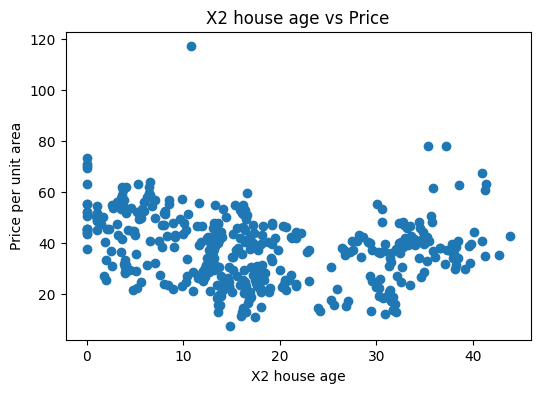

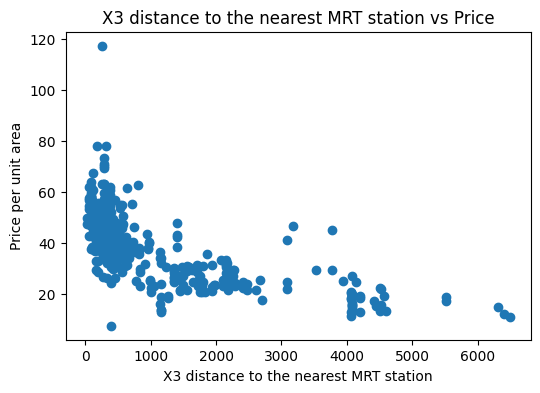

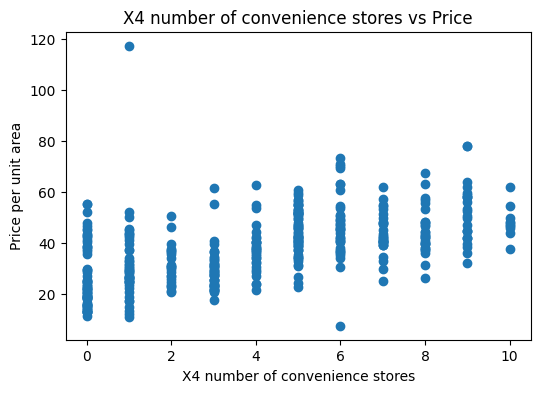

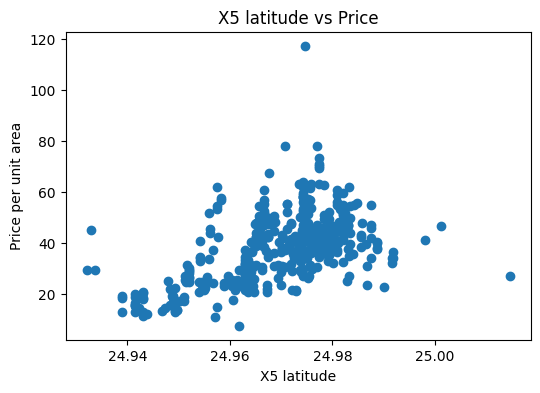

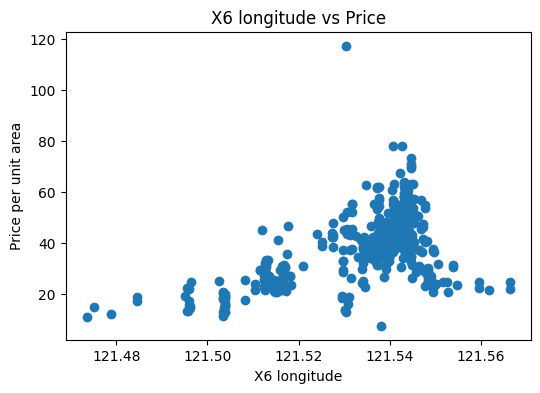

In [3]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Price per unit area')
    plt.title(f'{column} vs Price')
    plt.show()


## I. Linear Regression with One Feature

We'll start simple by predicting prices with linear regression, using only one feature. Pick any feature you feel demonstrates a good linear relationship from the graphs above.

### 0. Prepare Data

In [4]:
# Scale X
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Select the feature
feature_name = 'X4 number of convenience stores'
column_index = X.columns.get_loc(feature_name)
x = X_scaled[:, [column_index]]

# Scale y
scaler_y = StandardScaler()
y_array = y.values  # Make sure y is a NumPy array
y_scaled = scaler_y.fit_transform(y_array.reshape(-1, 1)).squeeze()

# Check shapes
print(x.shape)  # (n_samples, 1)
print(y_scaled.shape)  # (n_samples,)

(414, 1)
(414,)


We need to add a bias term to our dataset, so that our prediction line can cross through diferent points in the y-axis. Without a bias column, our model would look something like this:

$\hat{y} = w_1 x$

When we want it to look like this:

$\hat{y} = w_0 + w_1 x$

Implement the function below to add a bias term to each data point.

In [5]:
def make_linear_features(x):
    """
    Input:
        x: (n_samples, 1) array
    Output:
        X_augmented: (n_samples, 2) array [bias term + feature]
    """
    # TODO implement

    # n_samples = number of samples
    # bias = array of length n containing only ones
    # X_augmented = array of [bias_i, x_i]
    return None

In [6]:
# Prepare X matrix
X_linear = make_linear_features(x)

### 1. Prediction Function

Implement the predict function that performs matrix multiplication on the features array and the weights, like so:

$\hat{y} = X w$

Hint: using numpy's '@' operator can turn this into a super simple one-line implementation

In [7]:
def predict(X, weights):
    """
    Input:
        X: (n_samples, n_features) feature matrix
        weights: (n_features,) vector
    Output:
        y_pred: (n_samples,) predictions
    """
    # TODO implement
    return None


### 2. MSE Loss Function

For linear regression, we'll use **mean squared error** as our loss function. Implement the function beow that returns the **MSE** of a prediction.

In [8]:
def compute_mse(y_true, y_pred):
    """
    Input:
        y_true: (n_samples,)
        y_pred: (n_samples,)
    Output:
        mse: float
    """
    # TODO implement
    return None


### 3. Gradient Computation

We'll need to compute our gradients in order to adjust our weights. To compute our gradients, we use this formula:

$$
\text{gradients} = -\frac{2}{n} X^\top (y_{\text{true}} - \hat{y})
$$

- $(y_{\text{true}} - \hat{y})$ is the error vector (how wrong our predictions are)
- $X^\top (y_{\text{true}} - \hat{y})$ tells us how much each feature contributes to the total error. Note that the transpose of X and the error vector are being matrix multiplied.
- We multiply by $-2/n$ because:
    - MSE gradient derivation gives a factor of -2 when you differentiate.
    - Divide by n to match the mean (average over all samples)

Implement this formula. Hints:
- You can use '.T' to transpose a matrix
- Like before, you can use '@' for matrix multiplication

In [9]:
def compute_gradients(X, y_true, weights):
    """
    Input:
        X: (n_samples, n_features)
        y_true: (n_samples,)
        weights: (n_features,)
    Output:
        gradients: (n_features,)
    """
    # TODO implement
    return None


### 4. Training Loop (Gradient Descent)
Finally, implement the trainint funciton for gradient descent. For each epoch, the funciton should:
- Make a prediction using the current weights
- Compute the loss using MSE and store in the 'loss_history' array
- Compute the gradients
- Update the weights with the formula: 
    - $new\_weights = weights - learning\_rate * gradients$

The funciton should return the weights and the losses.

In [10]:
def train(X, y, epochs=1000, learning_rate=0.01):
    """
    Input:
        X: (n_samples, n_features)
        y: (n_samples,)
        epochs: int
        learning_rate: float
    Output:
        weights: (n_features,) trained weights
        loss_history: list of loss values
    """
    n_features = X.shape[1]
    weights = np.random.randn(n_features)  # Random initialization
    loss_history = []

    for epoch in range(epochs):
        # TODO implement
        # y_pred = prediction
        # loss = compute loss
        # append loss to loss_history

        # gradients = compute gradients
        # weights = update weights
        pass

    return weights, loss_history


In [11]:
weights, loss_history = train(X_linear, y_scaled, epochs=1000, learning_rate=0.01)

AttributeError: 'NoneType' object has no attribute 'shape'

### 5. Visualizaiton

Let's visualize our prediction function.

In [ ]:
# Scatter plot of original data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Training data')  # y is original target (unscaled)

# Generate a curve of predictions
x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
X_curve = make_linear_features(x_curve)

# Predict on scaled x
y_curve_scaled = predict(X_curve, weights)

# Inverse transform the predictions to original scale
y_curve = scaler_y.inverse_transform(y_curve_scaled.reshape(-1, 1)).squeeze()

# Plot model's fitted line
plt.plot(x_curve, y_curve, color='red', label='Fitted Line')
plt.xlabel(feature_name)
plt.ylabel('Price per unit area')
plt.title('Linear Regression Fit (Single Feature)')
plt.legend()
plt.show()

# Also inverse-transform final loss if you want (optional for display)
print(f"Final Training Loss (on scaled y): {loss_history[-1]:.4f}")


Congrats! You just predicted housing prices using linear regression with one feature. However, you may notice that your final loss (MSE) was quite large. This is because, in the real world, there are often many features that contribute to a target value. This is certainly true for housing prices. Let's try out a couple more variations of regression to see if we can minimize our loss as much as possible.

## II. Linear Regression with Multiple Features

Next, we'll try out linear regression using *all* of the given features, instead of just the one you chose for Step I. Thankfully, the functions you wrote generalize to using multiple features as predictors, so you've done the bulk of the work already.

### 0. Prepare Data
Use your make_linear_features function to add the bias term to your collection of all 6 features (using X_scaled)

In [ ]:
X_all = make_linear_features(X_scaled)

### 1. Re-train Linear Regression Model with All Features

Use your training function to train on all features, with 1000 epochs and a learning rate of 0.01.

In [ ]:
weights_all, loss_history_all = None, None # TODO train using all features
# Print final training loss
final_loss = loss_history_all[-1]
print(f"Final Training Loss (MSE): {final_loss:.4f}")

Compare the training loss above to the training loss you got in Step I. Is it less?

### III. Polynomial Regression with All Features

What if housing prices can't be fit with a straight line? We'll briefly explore polynomial regression to try to fit our data with **multiple degrees**. Recall that the final equation for our linear regression prediction function looked like this:

$\hat{y} = w_0 + w_1 X$

With polynomial regression, we'll compute the weights for **n** degrees, instead of just one. For example, if n=2, our prediction function looks like:

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_1 x_2 + w_5 x_2^2$

Notice how we compute weights for the bias term, and each combination of linear and quadratic terms.

The function below transforms our original features into a combination of features (like the formula above, just without the weights):

In [ ]:
def make_polynomial_features(X, degree):
    """
    Input:
        X: (n_samples, n_features) scaled input features
        degree: int, maximum degree of polynomial expansion
    Output:
        X_poly: (n_samples, n_output_features) array with polynomial terms
    """
    
    n_samples, n_features = X.shape
    # Start with bias term (will add manually later if you want)
    features = [np.ones((n_samples, 1))]  # Start with ones for degree 0 (bias)

    # Loop over degrees
    for deg in range(1, degree + 1):
        for comb in combinations_with_replacement(range(n_features), deg):
            feature = np.prod(X[:, comb], axis=1).reshape(-1, 1)
            features.append(feature)

    X_poly = np.hstack(features)
    return X_poly

Consider the example below where we compute loss with a degree of 3. Take note of the final loss - is it better or worse than linear regression? 

Fit the model using polynomial regression on all degrees 1-4. As degree **n** increased, did the model strictly get better? Worse? Better, then worse? Briefly write your findings at the bottom of this page. Give a short explanation of *why* you think this pattern occurred.

In [ ]:
degree = 3 # TODO experiment with different degrees
X_poly = make_polynomial_features(X_scaled, degree=degree)

# 2. Scale the expanded polynomial features
scaler_poly = StandardScaler()
X_poly_scaled = scaler_poly.fit_transform(X_poly)

# 3. Now train
weights_poly, loss_history_poly = train(X_poly_scaled, y_scaled, epochs=1000, learning_rate=0.01)
print(f"Final Training Loss for Degree {degree}: {loss_history_poly[-1]}")


### Writeup: Polynomial Regression with Degrees 1-4
TODO your findings go here